# Logistic Regression in Python (Step by Step)

The dataset comes from the UCI Machine Learning repository, and it is related to direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict whether the client will subscribe (1/0) to a term deposit (variable y).

## Import Libraries

In [69]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [70]:
# Take URL of the dataset and load it
# df = pd.read_csv('https://raw.githubusercontent.com/madmashup/targeted-marketing-predictive-engine/master/banking.csv')

# Save online dataset to PC
#df.to_csv('banking.csv')

## Load and View Dataset

In [71]:
data_set = pd.read_csv('banking.csv', header=0)
data_set = data_set.iloc[:,1:22]
data_set = data_set.dropna()
print(data_set.shape)
print(list(data_set.columns))

(41188, 21)
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']


In [72]:
data_set.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [73]:
data_set.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [74]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In the dataset 'Education' column has many categories and we need to reduce the categories for a better modelling. 
The education column has the following categories:

In [75]:
data_set['education'].unique()

array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'illiterate'],
      dtype=object)

Now group 'basic.4y', 'basic.9y' and 'basic.6y' together and call them 'basic'.

In [76]:
data_set['education'] = np.where(data_set['education'] == 'basic.4y', 'basic', data_set['education'])    
data_set['education'] = np.where(data_set['education'] == 'basic.6y', 'basic', data_set['education'])
data_set['education'] = np.where(data_set['education'] == 'basic.9y', 'basic', data_set['education'])

In [77]:
data_set['education'].unique()

array(['basic', 'unknown', 'university.degree', 'high.school',
       'professional.course', 'illiterate'], dtype=object)

## Data Exploration

##### Set font size and style of plots:

In [78]:
plt.rc("font", size=14)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

##### Count plot of y:

In [79]:
data_set['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

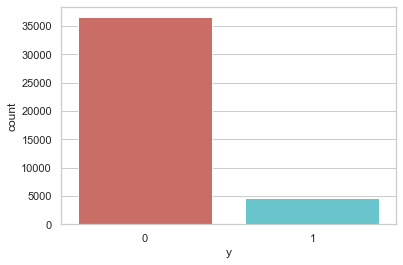

In [80]:
sns.countplot(x= 'y', data= data_set, palette='hls')
plt.show()

In [81]:
no_subscribtion_count = len(data_set[data_set['y'] == 0])
subscribtion_count = len(data_set[data_set['y'] == 1])

percentage_of_no_subscribtion = (no_subscribtion_count / (no_subscribtion_count + subscribtion_count))*100
print("percentage of no subscription is %.2f" % percentage_of_no_subscribtion)

percentage_of_subscribtion = (subscribtion_count / (no_subscribtion_count + subscribtion_count))*100
print("percentage of subscription is %.2f" % percentage_of_subscribtion)

percentage of no subscription is 88.73
percentage of subscription is 11.27


Our classes are imbalanced, and the ratio of no-subscription to subscription instances is 89:11. Before we go ahead to balance the classes, let’s do some more exploration.

In [82]:
data_set.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


**Observations:**
- The average age of customers who bought the term deposit is higher than that of the customers who didn’t.
- The pdays (days since the customer was last contacted) is understandably lower for the customers who bought it. The lower the pdays, the better the memory of the last call and hence the better chances of a sale.
- Surprisingly, campaigns (number of contacts or calls made during the current campaign) are lower for customers who bought the term deposit.

We can calculate categorical means for other categorical variables such as job, education and marital status to get a more detailed sense of our data.

In [83]:
data_set.groupby('job').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
job,,,,,,,,,,,
admin.,38.187296,254.312128,2.623489,954.319229,0.189023,0.015563,93.534054,-40.245433,3.550274,5164.125350,0.129726
blue-collar,39.555760,264.542360,2.558461,985.160363,0.122542,0.248995,93.656656,-41.375816,3.771996,5175.615150,0.068943
entrepreneur,41.723214,263.267857,2.535714,981.267170,0.138736,0.158723,93.605372,-41.283654,3.791120,5176.313530,0.085165
housemaid,45.500000,250.454717,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623,0.100000
management,42.362859,257.058140,2.476060,962.647059,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513,0.112175
retired,62.027326,273.712209,2.476744,897.936047,0.327326,-0.698314,93.430786,-38.573081,2.770066,5122.262151,0.252326
self-employed,39.949331,264.142153,2.660802,976.621393,0.143561,0.094159,93.559982,-40.488107,3.689376,5170.674384,0.104856
services,37.926430,258.398085,2.587805,979.974049,0.154951,0.175359,93.634659,-41.290048,3.699187,5171.600126,0.081381
student,25.894857,283.683429,2.104000,840.217143,0.524571,-1.408000,93.331613,-40.187543,1.884224,5085.939086,0.314286


In [84]:
data_set.groupby('marital').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
marital,,,,,,,,,,,
divorced,44.899393,253.790330,2.61340,968.639853,0.168690,0.163985,93.606563,-40.707069,3.715603,5170.878643,0.103209
married,42.307165,257.438623,2.57281,967.247673,0.155608,0.183625,93.597367,-40.270659,3.745832,5171.848772,0.101573
single,33.158714,261.524378,2.53380,949.909578,0.211359,-0.167989,93.517300,-40.918698,3.317447,5155.199265,0.140041
unknown,40.275000,312.725000,3.18750,937.100000,0.275000,-0.221250,93.471250,-40.820000,3.313038,5157.393750,0.150000


In [85]:
data_set.groupby('education').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
education,,,,,,,,,,,
basic,42.163910,263.043874,2.559498,974.877967,0.141053,0.191329,93.639933,-40.927595,3.729654,5172.014113,0.087029
high.school,37.998213,260.886810,2.568576,964.358382,0.185917,0.032937,93.584857,-40.940641,3.556157,5164.994735,0.108355
illiterate,48.500000,276.777778,2.277778,943.833333,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.777778,0.222222
professional.course,40.080107,252.533855,2.586115,960.765974,0.163075,0.173012,93.569864,-40.124108,3.710457,5170.155979,0.113485
university.degree,38.879191,253.223373,2.563527,951.807692,0.192390,-0.028090,93.493466,-39.975805,3.529663,5163.226298,0.137245
unknown,43.481225,262.390526,2.596187,942.830734,0.226459,0.059099,93.658615,-39.877816,3.571098,5159.549509,0.145003


## Visualizations

- ### job vs y

Text(0, 0.5, 'Proportion of Customers')

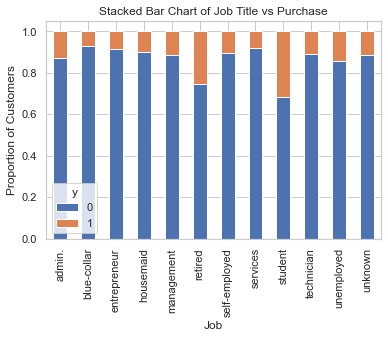

In [86]:
table=pd.crosstab(data_set.job,data_set.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Job Title vs Purchase')
plt.xlabel('Job')
plt.ylabel('Proportion of Customers')

Text(0, 0.5, 'Frequency of Purchase')

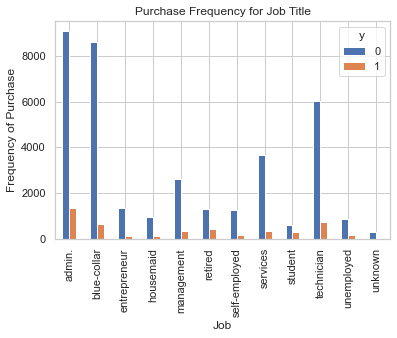

In [87]:
pd.crosstab(data_set.job,data_set.y).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')

- ### marital vs y

Text(0, 0.5, 'Proportion of Customers')

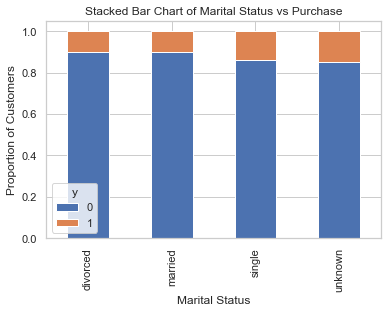

In [88]:
table=pd.crosstab(data_set.marital,data_set.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')

Text(0, 0.5, 'Frequency of Purchase')

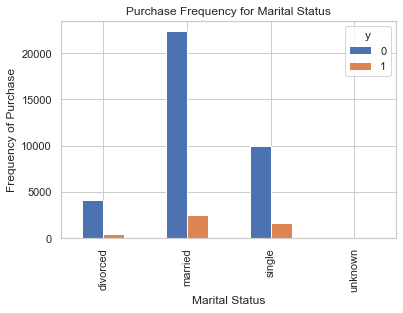

In [89]:
pd.crosstab(data_set.marital,data_set.y).plot(kind='bar')
plt.title('Purchase Frequency for Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Frequency of Purchase')

- ### education vs y

Text(0, 0.5, 'Proportion of Customers')

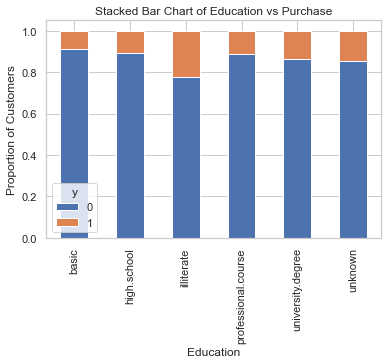

In [90]:
table=pd.crosstab(data_set.education,data_set.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')

Text(0, 0.5, 'Frequency of Purchase')

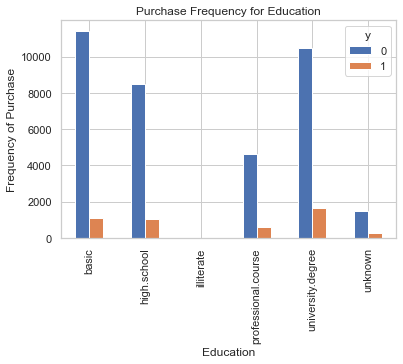

In [91]:
pd.crosstab(data_set.education,data_set.y).plot(kind='bar')
plt.title('Purchase Frequency for Education')
plt.xlabel('Education')
plt.ylabel('Frequency of Purchase')

- ### Day of Week vs y

Text(0, 0.5, 'Frequency of Purchase')

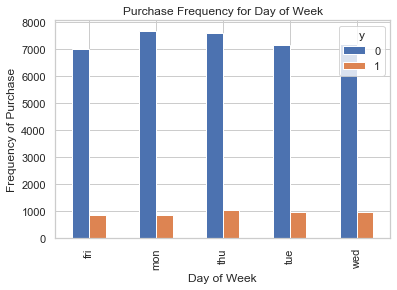

In [92]:
pd.crosstab(data_set.day_of_week,data_set.y).plot(kind='bar')
plt.title('Purchase Frequency for Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency of Purchase')

- ### Month vs y

Text(0, 0.5, 'Frequency of Purchase')

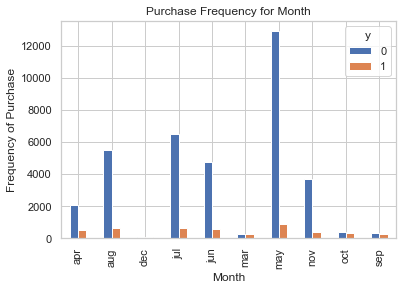

In [93]:
pd.crosstab(data_set.month,data_set.y).plot(kind='bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')

- ### Histogram of Age

Text(0, 0.5, 'Frequency')

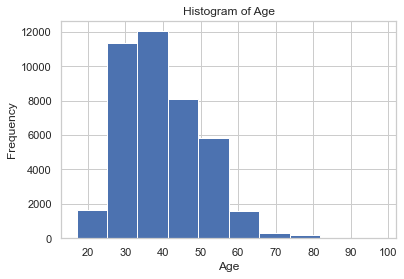

In [94]:
data_set.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

- ### poutcome vs y

Text(0, 0.5, 'Frequency of Purchase')

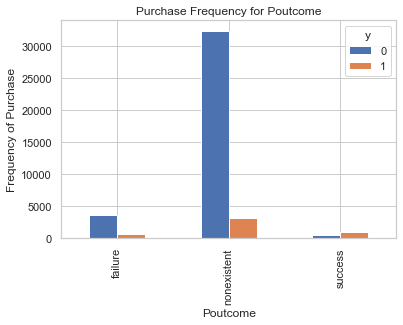

In [95]:
pd.crosstab(data_set.poutcome,data_set.y).plot(kind='bar')
plt.title('Purchase Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Purchase')

## Create Dummy Variables

In [96]:
data_set['poutcome'].unique()

array(['nonexistent', 'success', 'failure'], dtype=object)

In [97]:
# cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
# for var in cat_vars:
#     cat_list='var'+'_'+var
#     cat_list = pd.get_dummies(data_set[var], prefix=var)
#     data1=data_set.join(cat_list)
#     data=data1
# cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
# data_vars=data.columns.values.tolist()
# to_keep=[i for i in data_vars if i not in cat_vars]

### Get dummy variables for 'poutcome' :

In [98]:
# get dummy variables for 'poutcome' :
category_list = pd.get_dummies(data_set['poutcome'], prefix='poutcome')
category_list.head()

,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0,1,0
1,0,1,0
2,0,0,1
3,0,1,0
4,0,0,1


### Join dummy variables (category_list) to the dateset:

In [99]:
# join dummy variables (category_list) to the dateset:
data = data_set.join(category_list)
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,poutcome_failure,poutcome_nonexistent,poutcome_success
0,44,blue-collar,married,basic,unknown,yes,no,cellular,aug,thu,...,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0,0,1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0,0,1,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,success,-1.7,94.055,-39.8,0.729,4991.6,1,0,0,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0,0,1,0
4,55,retired,married,basic,no,yes,no,cellular,aug,fri,...,success,-2.9,92.201,-31.4,0.869,5076.2,1,0,0,1


### Exclude all the categorical variables from the dataset:

In [100]:
# exclude all the categorical variables from the dataset:
category_variables=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
data_variables=data.columns.values.tolist()
to_keep=[i for i in data_variables if i not in category_variables]

In [101]:
data_final = data[to_keep]

In [102]:
data_final.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,poutcome_failure,poutcome_nonexistent,poutcome_success
0,44,210,1,999,0,1.4,93.444,-36.1,4.963,5228.1,0,0,1,0
1,53,138,1,999,0,-0.1,93.200,-42.0,4.021,5195.8,0,0,1,0
2,28,339,3,6,2,-1.7,94.055,-39.8,0.729,4991.6,1,0,0,1
3,39,185,2,999,0,-1.8,93.075,-47.1,1.405,5099.1,0,0,1,0
4,55,137,1,3,1,-2.9,92.201,-31.4,0.869,5076.2,1,0,0,1


In [103]:
data_final.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success'],
      dtype=object)

## Over-sampling using SMOTE (Synthetic Minority Over-sampling Technique)

In [104]:
X = data_final.iloc[:,data_final.columns != 'y']
y = data_final.iloc[:,data_final.columns == 'y']

In [105]:
X.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,44,210,1,999,0,1.4,93.444,-36.1,4.963,5228.1,0,1,0
1,53,138,1,999,0,-0.1,93.200,-42.0,4.021,5195.8,0,1,0
2,28,339,3,6,2,-1.7,94.055,-39.8,0.729,4991.6,0,0,1
3,39,185,2,999,0,-1.8,93.075,-47.1,1.405,5099.1,0,1,0
4,55,137,1,3,1,-2.9,92.201,-31.4,0.869,5076.2,0,0,1


In [106]:
y.head()

,y
0,0
1,0
2,1
3,0
4,1


In [107]:
# Import SMOTE Function :
from imblearn.over_sampling import SMOTE

over_sample = SMOTE(random_state=0)

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [109]:
X_train_sm, y_train_sm = over_sample.fit_resample(X_train, y_train)

In [110]:
columns = X_train.columns
oversampling_data_X = pd.DataFrame(data=X_train_sm, columns=columns)
oversampling_data_y = pd.DataFrame(data=y_train_sm, columns=['y'])

In [111]:
# we can Check the numbers of our data :
print("length of oversampled data is ",len(oversampling_data_X))
print("Number of no subscription in oversampled data",len(oversampling_data_y[oversampling_data_y['y']==0]))
print("Number of subscription",len(oversampling_data_y[oversampling_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(oversampling_data_y[oversampling_data_y['y']==0])/len(oversampling_data_X))
print("Proportion of subscription data in oversampled data is ",len(oversampling_data_y[oversampling_data_y['y']==1])/len(oversampling_data_X))

length of oversampled data is  58446
Number of no subscription in oversampled data 29223
Number of subscription 29223
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


---  
  Now we have a perfect balanced data! You may have noticed that I over-sampled only on the training data, because by oversampling only on the training data, none of the information in the test data is being used to create synthetic observations, therefore, no information will bleed from test data into the model training.

  ---

## Recursive Feature Elimination (RFE)

RFE is based on the idea to repeatedly construct a model and choose either the best feature. Then setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted.

In [112]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

reg_model = LogisticRegression()

rfe_model = RFE(reg_model, n_features_to_select=5)
rfe = rfe_model.fit(oversampling_data_X, oversampling_data_y)

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed w

In [113]:
print(rfe.support_)

[False False  True False False False False False  True False  True  True
  True]


In [114]:
print(rfe.ranking_)

[8 7 1 9 3 4 2 5 1 6 1 1 1]


In [115]:
oversampling_data_X.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed',
       'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')

In [116]:
cols = ['campaign','euribor3m','poutcome_failure', 'poutcome_nonexistent', 'poutcome_success']

X = oversampling_data_X[cols]
y = oversampling_data_y['y']

In [117]:
X.head()

,campaign,euribor3m,poutcome_failure,poutcome_nonexistent,poutcome_success
0,7,4.076,0,1,0
1,7,4.963,0,1,0
2,2,4.967,0,1,0
3,1,3.053,0,1,0
4,2,4.857,0,1,0


In [118]:
y.head()

0    0
1    0
2    0
3    1
4    0
Name: y, dtype: int64

## Implementing the model

In [119]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.603534
         Iterations 7
                           Results: Logit
Model:                Logit             Pseudo R-squared:  0.129     
Dependent Variable:   y                 AIC:               70558.2832
Date:                 2022-07-15 15:54  BIC:               70603.1625
No. Observations:     58446             Log-Likelihood:    -35274.   
Df Model:             4                 LL-Null:           -40512.   
Df Residuals:         58441             LLR p-value:       0.0000    
Converged:            1.0000            Scale:             1.0000    
No. Iterations:       7.0000                                         
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
campaign             -0.0377   0.0044  -8.6409 0.0000 -0.0462 -0.0291
euribor3m       

## Logistic Regression Model Fitting

In [120]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [121]:
reg_model = LogisticRegression()
model = reg_model.fit(X_train, y_train)

In [122]:
y_pred = model.predict(X_test)

In [123]:
accuracy = model.score(X_test, y_test)*100
print('Accuracy of Logistic Regression Classifier is: {:.0f}%'.format(accuracy))

Accuracy of Logistic Regression Classifier is: 75%


## Confusion Matrix

In [124]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[4744 1081]
 [1875 3990]]


Result is telling us that we have (4744 + 3990) 8734 correct predictions and (1875 + 3990) 5865 incorrect predictions.

Text(57.5, 0.5, 'Predicted Output')

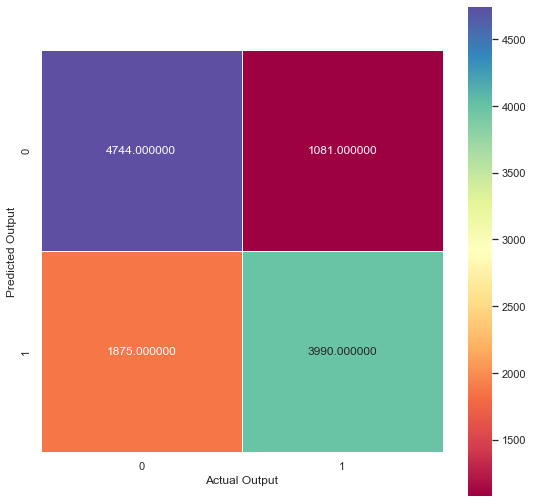

In [125]:
plt.figure(figsize=(9,9))

sns.heatmap(cm, annot=True, fmt="-3f", linewidth=0.5, square=True, cmap="Spectral")
plt.xlabel("Actual Output")
plt.ylabel("Predicted Output")

## Compute precision, recall, F-measure and support

In [126]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.81      0.76      5825
           1       0.79      0.68      0.73      5865

    accuracy                           0.75     11690
   macro avg       0.75      0.75      0.75     11690
weighted avg       0.75      0.75      0.75     11690



## ROC Curve

In [127]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [128]:
logreg_roc_auc = roc_auc_score(y_test, y_pred)
logreg_roc_auc

0.7473637531146066

In [129]:
fpr, tpr, threshold = roc_curve(y_test, model.predict_proba(X_test)[:,1])
fpr, tpr, threshold

(array([0.        , 0.        , 0.        , ..., 0.99828326, 0.99862661,
        1.        ]),
 array([0.00000000e+00, 1.70502984e-04, 4.94458653e-02, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]),
 array([1.99767602e+00, 9.97676020e-01, 9.97441860e-01, ...,
        7.35974558e-03, 7.33937498e-03, 5.88567354e-04]))

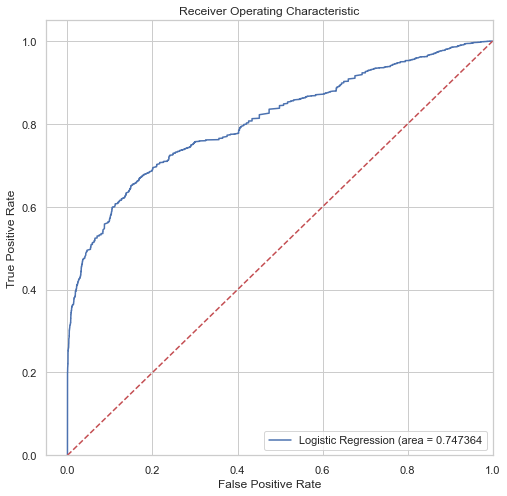

In [130]:
plt.figure(figsize=(8,8))

plt.plot(fpr, tpr, label='Logistic Regression (area = %2f' % logreg_roc_auc)

plt.plot([0, 1], [0, 1], 'r--')

plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()

The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).